分类问题损失函数区分

二分类	sigmoid函数	二分类交叉熵损失函数（binary_crossentropy）

多分类	Softmax函数	多类别交叉熵损失函数（categorical_crossentropy）

多标签分类	sigmoid函数	二分类交叉熵损失函数（binary_crossentropy）

In [2]:
import os
import sys
import time
import sklearn
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

sys.version_info(major=3, minor=7, micro=3, releaselevel='final', serial=0)
matplotlib 3.0.3
numpy 1.16.2
pandas 0.24.2
sklearn 0.20.3
tensorflow 2.0.0-rc0
tensorflow.python.keras.api._v2.keras 2.2.4-tf


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(55000, 28, 28) (55000,)
(5000, 28, 28) (5000,)
(10000, 28, 28) (10000,)


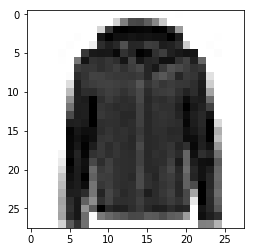

In [4]:
def show_single_image(image_arr):
    """
    :param image_arr: 图像的数组
    """
    # cmap="binary" 灰度图像显示，默认rgb显示
    plt.imshow(image_arr, cmap="binary")
    plt.show()
    
show_single_image(x_train[0])

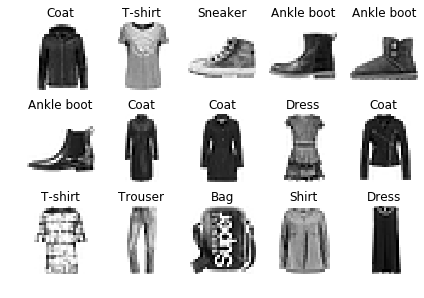

In [6]:
class_names = ["T-shirt","Trouser","Pullover","Dress",
              "Coat","Sandal","Shirt","Sneaker","Bag",
              "Ankle boot"]

def show_imgs(n_rows, n_cols, x_data, y_data, class_names):
    """
    :param n_rows: 展示的行
    :param n_cols: 展示的列
    :param x_data: 图像数据
    :param y_data: 图像类别索引
    :param class_names: 图像类别索引所对应的名称
    """
    assert len(x_data) == len(y_data)
    # 展示的行和列乘积不能大于样本数，否则样本数不足
    assert n_rows * n_cols < len(x_data)
   
    # 缩放比例
    plt.figure(figsize=(n_cols*1.4, n_rows*1.6))
    # 将每行每列放上图片
    for row in range(n_rows):
        for col in range(n_cols):
            
            # 计算当前图片的索引 = 当前已放好的图片数据 + 当前的列
            index = n_cols * row + col
            plt.subplot(n_rows,n_cols,index+1)
            plt.imshow(x_data[index],cmap="binary",
                      interpolation="nearest")
            plt.axis("off")
            plt.title(class_names[y_data[index]])
    plt.show()
    


show_imgs(3,5,x_train,y_train,class_names)

In [7]:
# relu: y = max(0, x)
# softmax: 将向量变成概率分布。x = [x1, x2, x3],
#          y = [e^x1/sum, e^x2/sum, e^x3/sum, sum=e^x1 + e^x2 + e^x3]

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation="relu"),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])


# reason for sparse_categorical_crossentropy: y -> index ,即y是单值  y_train[0] = 4
# reason for categorical_crossentropy: y -> one_hot->[] ,即y已经由one_hot转为向量
model.compile(loss = "sparse_categorical_crossentropy", # 损失函数
              optimizer = "adam",                       # 模型的求解方法
              metrics = ["accuracy"])                   # 增加 accuracy 指标

In [8]:
# 查询模型概况
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [9]:
# epochs 训练集遍历次数
history = model.fit(x_train,y_train,epochs=10,
          validation_data=(x_valid,y_valid),
          )

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 7s 119us/sample - loss: 2.5711 - accuracy: 0.7584 - val_loss: 0.6151 - val_accuracy: 0.8100
Epoch 2/10
55000/55000 [==============================] - 5s 94us/sample - loss: 0.5047 - accuracy: 0.8271 - val_loss: 0.5023 - val_accuracy: 0.8294
Epoch 3/10
55000/55000 [==============================] - 5s 93us/sample - loss: 0.4453 - accuracy: 0.8443 - val_loss: 0.5003 - val_accuracy: 0.8396
Epoch 4/10
55000/55000 [==============================] - 5s 97us/sample - loss: 0.4175 - accuracy: 0.8519 - val_loss: 0.4138 - val_accuracy: 0.8524
Epoch 5/10
55000/55000 [==============================] - 5s 94us/sample - loss: 0.3987 - accuracy: 0.8585 - val_loss: 0.4878 - val_accuracy: 0.8358
Epoch 6/10
55000/55000 [==============================] - 5s 88us/sample - loss: 0.3891 - accuracy: 0.8625 - val_loss: 0.3813 - val_accuracy: 0.8634
Epoch 7/10
55000/55000 [==============================] 

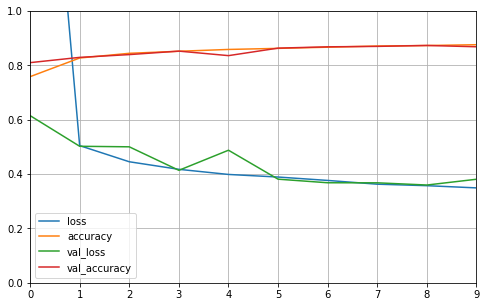

In [13]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()

plot_learning_curves(history)

In [ ]:
model.evaluate(x_test,y_test)